In [1]:
# importing necessary libraries
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
#loading the csv
df = pd.read_csv('music.csv')

In [3]:
df.head()

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz


In [4]:
df['genre'].unique()

array(['HipHop', 'Jazz', 'Classical', 'Dance', 'Acoustic'], dtype=object)

In [5]:
#replacing the genre with target variables
codes, uniques = pd.factorize(df['genre'])
df['genre'] = codes

In [6]:
df.head()

,age,gender,genre
0,20,1,0
1,23,1,0
2,25,1,0
3,26,1,1
4,29,1,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     18 non-null     int64
 1   gender  18 non-null     int64
 2   genre   18 non-null     int64
dtypes: int64(3)
memory usage: 560.0 bytes


In [8]:
df.describe()

,age,gender,genre
count,18.000000,18.000000,18.000000
mean,27.944444,0.500000,2.000000
std,5.127460,0.514496,1.328422
min,20.000000,0.000000,0.000000
25%,25.000000,0.000000,1.000000
50%,28.000000,0.500000,2.000000
75%,31.000000,1.000000,3.000000
max,37.000000,1.000000,4.000000


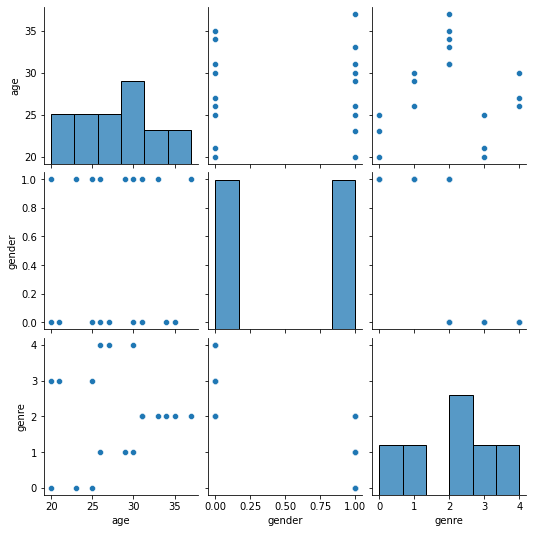

In [9]:
#visualizing the dataset
sns.pairplot(df)

In [10]:
# X -> features, y -> label
X = df[['age','gender']]
y = df['genre']
 
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 0)
 
# training a KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
 
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print(accuracy)
 
# creating a confusion matrix
knn_predictions = knn.predict(X_test)

# creating a confusion matrix
cm = confusion_matrix(y_test, knn_predictions)

0.8333333333333334


In [11]:
#a funtion for plotting confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
Accuracy: 83.33333333333334%


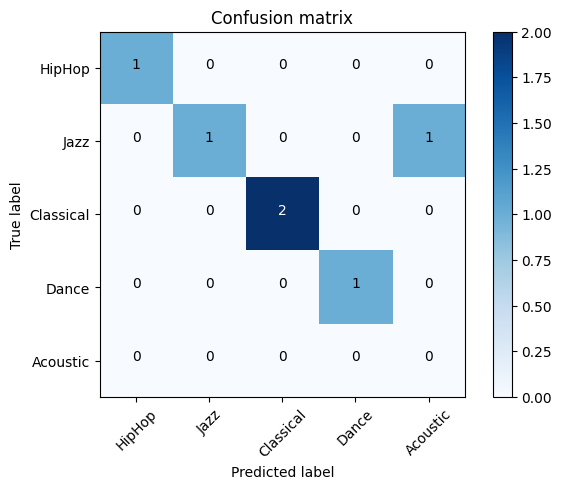

In [12]:
#plotting the accuracy
from sklearn import metrics
cm = metrics.confusion_matrix(knn_predictions,y_test)
plot_confusion_matrix(cm,classes=['HipHop', 'Jazz', 'Classical', 'Dance', 'Acoustic'])
print("Accuracy: " + str(accuracy*100) + "%")